## Travel Tips Algorithm using Networks
In this notebook, I create an algorithm for travel recommendations. The data was collected from a class at the University of Copenhagen where students were asked to list their four favorite cities. The recommendation function will base travel recommendations on other students who have at least one favourite city in common with the person of interest. I enter my own four favourite cities to test the recommendations.

In [4]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
# Load data
df= pd.read_csv("./menti-cities.csv", sep=";")
# Rename columns
df = df.rename(
    columns = {
        'Classmate:': "node_id",
        'City 1:': "city1",
        'City 2:': "city2",
        'City 3:': "city3",
        'City 4:': 'city4'
    }
)
df.head()

,node_id,city1,city2,city3,city4
0,1,Copenhagen,Rome,Munich,Brisbane
1,2,Copenhagen,Milan,Lisbon,Prague
2,3,Reykjavík,Copenhagen,Oslo,Gøteborg
3,4,Hong Kong,Budapest,Barcelona,Tokyo
4,5,Dublin,Seoul,Copenhagen,Porto


### Add myself to the data

In [7]:
# Define node_id (one higher than the max existing)
new_node_id = df['node_id'].max() + 1

# Create the new row with my favorite cities
new_row = {
    "node_id": new_node_id,
    "city1": "Copenhagen",
    "city2": "Florence",
    "city3": "Vienna",
    "city4": "Paris"
}

# Append to dataframe
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

df.tail()

,node_id,city1,city2,city3,city4
20,21,Hong Kong,Singapore,Tokyo,Bangkok
21,22,Los Angeles,London,Chicago,Copenhagen
22,23,Paris,Rome,Berlin,London
23,24,Shanghai,Barcelona,Dubrovnik,Chiengmai
24,25,Copenhagen,Florence,Vienna,Paris


### Create a bipartite graph

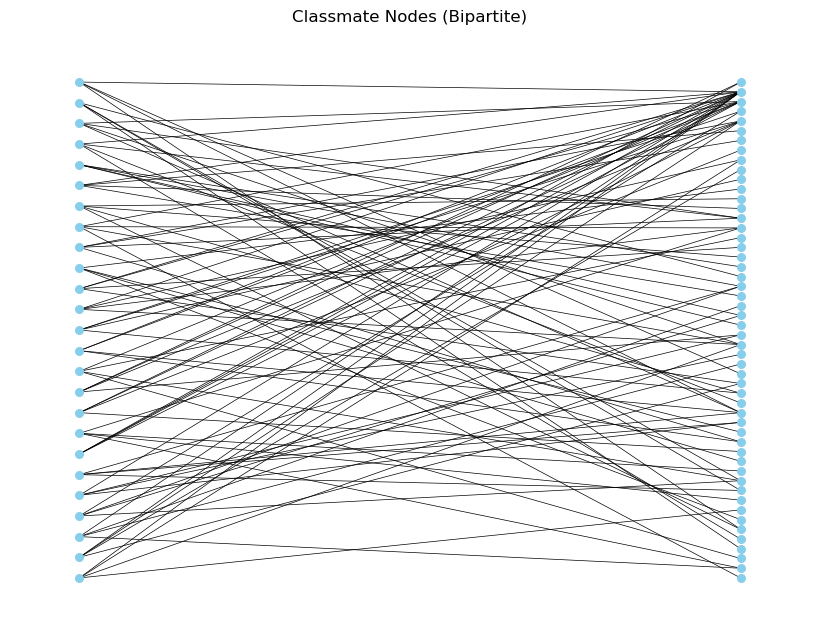

In [10]:
G = nx.Graph()

# Add students as nodes
for node_id in df.node_id:
    G.add_node(
        node_id, 
        bipartite="classmate")
    
# Make list of all cities
list_of_cities = [city for sublist in df[["city1", "city2", "city3", "city4"]].values.tolist() for city in sublist]

# Remove duplicate cities
list_of_cities = list(set(list_of_cities))

# Add cities as nodes
for city in list_of_cities:
    G.add_node(
        city,
        bipartite="city"
    )
    
# Make edges connecting students with their respective cities
for _, row in df.iterrows():
    G.add_edge(row.node_id, row.city1)
    G.add_edge(row.node_id, row.city2)
    G.add_edge(row.node_id, row.city3)
    G.add_edge(row.node_id, row.city4)

# Separate node sets for bipartite layout
classmate_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == "classmate"]

# Bipartite layout to put the two sets in two layers
pos = nx.bipartite_layout(G, classmate_nodes)

plt.figure(figsize=(8, 6))
nx.draw(
    G, pos,
    with_labels=False,
    node_color="skyblue",
    node_size=30,
    edge_color="black",
    width = 0.5
)
plt.title("Classmate Nodes (Bipartite)")
plt.show()

### Create recommendation function 

In [13]:
def travel_tips(graph, node_id):
    
    # Find cities that this person enjoyed in the past
    cities_enjoyed = [n for n in graph.neighbors(node_id)]
    
    # Find other people who enjoyed same cities
    others_who_enjoyed_same_cities = [n for city in cities_enjoyed for n in G.neighbors(city)]
    
    # Find other all cities enjoyed by these people with similar taste
    cities_they_like = [city for node_id in others_who_enjoyed_same_cities for city in G.neighbors(node_id)]
    cities_they_like = list(set(cities_they_like))
    
    # Remove cities that have already been visited 
    for city in cities_enjoyed:
        if city in cities_they_like:
            cities_they_like.remove(city)

    return cities_they_like


In [15]:
# Check what cities are recommended to me 
travel_tips(G, 25)

['Oslo',
 'Chicago',
 'Brisbane',
 'Shanghai',
 'Utrecht',
 'New York',
 'Seoul',
 'Los Angeles',
 'Heidelberg',
 'Lisbon',
 'Gøteborg',
 'Dublin',
 'Rome',
 'Porto',
 'Reykjavík',
 'Esperence',
 'Tokyo',
 'Girona',
 'Rom',
 'Sydney',
 'Edinburgh',
 'London',
 'Oxford',
 'Milan',
 'Munich',
 'Melbourne',
 'Ericeira',
 'Prague',
 'Berlin',
 'Aarhus']